In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [ ]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    finalNumber: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

In [ ]:
def adder(state: AgentState) -> AgentState:
    """ This node add the 2 number"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state


def subtractor(state: AgentState) -> AgentState:
    """ This node subtract the 2 number"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state


def decide_next_node(state: AgentState) -> AgentState:
    """This function decide the next node to execute based on state operation"""
    match state['operation']:
        case "+":
            return "addition_operation"
        case "-":
            return "substraction_operation"
        

def adder2(state: AgentState) -> AgentState:
    """ This node add the 2 number"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state


def subtractor2(state: AgentState) -> AgentState:
    """ This node subtract the 2 number"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state


def decide_next_node2(state: AgentState) -> AgentState:
    """This function decide the next node to execute based on state operation"""
    match state['operation2']:
        case "+":
            return "addition_operation2"
        case "-":
            return "substraction_operation2"

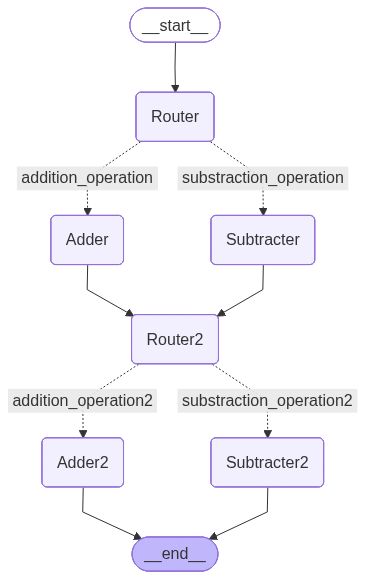

In [22]:
graph = StateGraph(AgentState)

graph.add_node("Adder",adder)
graph.add_node("Subtracter",subtractor)
graph.add_node("Router",lambda state:state) # Pass through function

graph.add_node("Adder2",adder2)
graph.add_node("Subtracter2",subtractor2)
graph.add_node("Router2",lambda state:state) # Pass through function


graph.add_edge(START,"Router")
graph.add_conditional_edges("Router",decide_next_node,{
    "addition_operation": "Adder",
    "substraction_operation":"Subtracter"
})
graph.add_edge("Adder","Router2")
graph.add_edge("Subtracter","Router2")

graph.add_conditional_edges("Router2",decide_next_node2,{
    "addition_operation2": "Adder2",
    "substraction_operation2":"Subtracter2"
})

graph.add_edge("Adder2",END)
graph.add_edge("Subtracter2",END)

graph.compile()

In [23]:
result = app.invoke({
    "number1":10,
    "number2":2,
    "operation":"-",
    "number3":10,
    "operation2":"+",
    "number4":2,
    })
print(result['finalNumber'])
print(result['finalNumber2'])

KeyError: 'operation2'